In [88]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

In [89]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-01-25.csv', header=None)

In [90]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-01-25/"+str(i)+"/data_structures_NQI_results2018-01-25.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [91]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


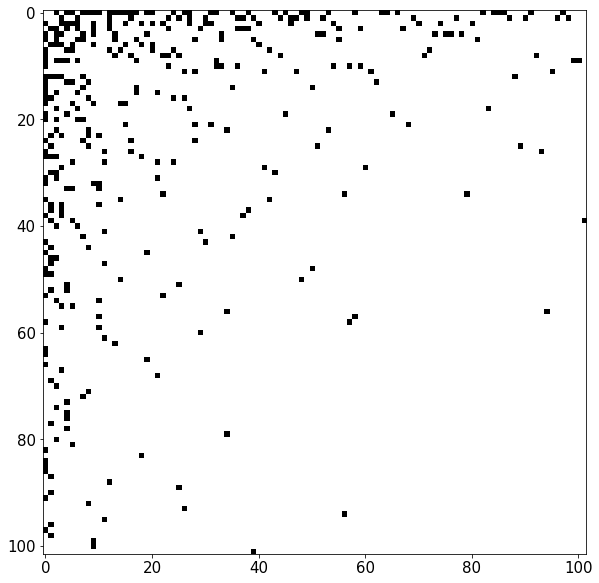

In [21]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [92]:
# import the simulated network
# load the dict of dataframes
with open('simulation_100/simulation_100.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [93]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_100/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_100/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_100/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_100/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [22]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
  #  fig = pyplot.figure(figsize=(10, 10)) # in inches
  #  pyplot.imshow(adjacency_matrix,
   #               cmap="Greys",
  #                interpolation="none")
    
    fig = plt.figure(figsize=(10, 10))  # in inches
    plt.imshow(adjacency_matrix, cmap="Greys", interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    
    
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)
    plt.savefig('figure3_4.pdf')
    plt.show()

In [94]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k]  
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [12]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [13]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [95]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data

    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [96]:
parameter_LIST = {}
for i in tqdm(range(len(simutable))):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:42<00:00, 11.14s/it]


In [97]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
                
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 1.0160613840887409e-124
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 1.2880480750867355e-152
Likelihood: 0
Likelihood: 2.5360180047068737e-88
Likelihood: 0.0
Likelihood: 2.288541187284085e-171
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.4637032064418582e-290
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.4113026152478405e-70
Likelihood: 0.0
Likelihood: 2.5360180047068737e-88

Likelihood: 4.314242259264859e-177
Likelihood: 1.316567025910055e-255
Likelihood: 6.562909608283912e-259
Likelihood: 1.5983552609072347e-83
Likelihood: 5.430110557034181e-162
Likelihood: 1.378259686427126e-203
Likelihood: 1.558536754284422e-118
Likelihood: 7.532164235087252e-177
Likelihood: 4.2524941805596985e-241
Likelihood: 2.584298168416844e-155
Likelihood: 5.545933291356805e-242
Likelihood: 0.0
Likelihood: 2.217165093164122e-61
Likelihood: 1.7033977128108496e-267
Likelihood: 3.238898408923794e-53
Likelihood: 1.9947136060536136e-47
Likelihood: 2.1259742988443852e-151
Likelihood: 2.372292043254329e-121
Likelihood: 3.4975352098303176e-104
Likelihood: 0.0
Likelihood: 5.748769259621342e-66
Likelihood: 5.443858068455129e-72
Likelihood: 1.3077983102909776e-245
Likelihood: 1.3163721890702523e-133
Likelihood: 4.181442846067304e-106
Likelihood: 6.2595796372264246e-173
Likelihood: 6.063895899014534e-161
Likelihood: 2.26607953618467e-92
Likelihood: 8.674911348924621e-82
Likelihood: 6.594568855

Likelihood: 2.2163868706119994e-14
Likelihood: 1.1768293467153384e-63
Likelihood: 1.0866620161647758e-109
Likelihood: 6.031701160549227e-99
Likelihood: 1.3396449712935225e-236
Likelihood: 3.884824472323179e-74
Likelihood: 1.174051489098298e-10
Likelihood: 6.863204973325666e-84
Likelihood: 1.643962448538656e-32
Likelihood: 2.0260124662765716e-47
Likelihood: 2.1692374180324102e-50
Likelihood: 8.04001810896774e-45
Likelihood: 1.1323718870844976e-76
Likelihood: 9.207378244844711e-62
Likelihood: 9.275531018586333e-35
Likelihood: 4.648914849214476e-40
Likelihood: 1.8254307512977976e-280
Likelihood: 2.7501784326577472e-24
Likelihood: 2.5690354104178898e-85
Likelihood: 5.729827448307359e-48
Likelihood: 3.0442165247688844e-50
Likelihood: 1.1242879371583875e-47
Likelihood: 5.528168493494587e-114
Likelihood: 1.6409478230812003e-65
Likelihood: 1.918814610298806e-96
Likelihood: 0.0013910573085719315
Likelihood: 5.506996849765385e-109
Likelihood: 2.0070800467870594e-46
Likelihood: 2.7524890304897673

Likelihood: 7.887000691491546e-55
Likelihood: 7.910687234022764e-10
Likelihood: 1.282404059884765e-18
Likelihood: 2.3209182743387386e-13
Likelihood: 0.01220837585294762
Likelihood: 5.453367925835981e-16
Likelihood: 1.5169415238203036e-16
Likelihood: 1.6323115844116853e-12
Likelihood: 1.5732901037094221e-15
Likelihood: 1.0154938267917512e-11
Likelihood: 5.629585172350753e-06
Likelihood: 1.0861742432425144e-25
Likelihood: 3.0896298970016915e-13
Likelihood: 2.680731415760092e-15
Likelihood: 8.123497070097792e-24
Likelihood: 4.3200157409145953e-17
Likelihood: 1.0281653877476363e-18
Likelihood: 8.048679675131884e-22
Likelihood: 1.863555131547431e-30
Likelihood: 0.13475711585164674
Likelihood: 3.952728121867819e-22
Likelihood: 7.45232591450245e-18
Likelihood: 0.058287709397540854
Likelihood: 0.02252095859051744
Likelihood: 6.2631866917066934e-24
Likelihood: 7.935328456240289e-26
Likelihood: 0.05722038530468987
Likelihood: 2.359071626686426e-15
Likelihood: 1.966252316341485e-24
Likelihood: 1.

Likelihood: 0.04289008251679176
Likelihood: 0.03363036482287209
Likelihood: 0.0025251832758919923
Likelihood: 0.033884911767416884
Likelihood: 0.29850848209059927
Likelihood: 0.0072541814226454665
Likelihood: 0.14268838982067628
Likelihood: 0.010624516339893676
Likelihood: 0.005081707531347155
Likelihood: 0.0009775077215794467
Likelihood: 0.6150895071309108
Likelihood: 0.6968812154427892
Likelihood: 0.00016164461460808511
Likelihood: 0.004954522583108067
Likelihood: 0.044300125889008495
Likelihood: 0.0002755975139975988
Likelihood: 6.62900370253068e-07
Likelihood: 0.36736091156606543
Likelihood: 0.06798495026543211
Likelihood: 0.00221852926486584
Likelihood: 0.011172231604659322
Likelihood: 0.0007895911743403668
Likelihood: 0.006007623196732344
Likelihood: 0.01529187492464674
Likelihood: 0.00013866076474296007
Likelihood: 5.91035476662898e-05
Likelihood: 0.01990787443361619
Likelihood: 0.02593065065321045
Likelihood: 0.01451136234764083
Likelihood: 0.0014457141450066383
Likelihood: 0.4

Likelihood: 0.08102143580534137
Likelihood: 0.08206322900855524
Likelihood: 0.08329139522622232
Likelihood: 0.07957982599441914
Likelihood: 0.08428365093625902
Likelihood: 0.0859653842844202
Likelihood: 0.08172026518025956
Likelihood: 0.08555286252941334
Likelihood: 0.08241763728304446
Likelihood: 0.08044543748081574
Likelihood: 0.08176919306940628
Likelihood: 0.07907856697927783
Likelihood: 0.08011982446427049
Likelihood: 0.08202500740990176
Likelihood: 0.085048195004525
Likelihood: 0.08261246474083338
Likelihood: 0.07919485159698096
Likelihood: 0.08118220471606721
Likelihood: 0.07896826877200311
Likelihood: 0.08607993170276261
Likelihood: 0.078216071561714
Likelihood: 0.08241730364485579
Likelihood: 0.07883238818403832
Likelihood: 0.07414821101485923
Likelihood: 0.07840966922272458
Likelihood: 0.07924887886307079
Likelihood: 0.0791492665098342
Likelihood: 0.07631527776880363
Likelihood: 0.0847771205123556
Likelihood: 0.0732910196706935
Likelihood: 0.07739392681041467
Likelihood: 0.08

Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.4924979181482211e-115
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 3.6174405837389814e-79
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likel

Likelihood: 1.4486951380887814e-280
Likelihood: 0.0
Likelihood: 1.5899029417362144e-118
Likelihood: 2.7446128255713146e-132
Likelihood: 4.627271797525186e-105
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1384891651599056e-205
Likelihood: 2.0428203529356674e-240
Likelihood: 0.0
Likelihood: 5.78173330454632e-168
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.535538521384043e-206
Likelihood: 1.5830738272177522e-171
Likelihood: 1.5198902304212434e-153
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.379352319278974e-183
Likelihood: 7.590081571154252e-201
Likelihood: 0.0
Likelihood: 9.54906727907997e-155
Likelihood: 6.393e-321
Likelihood: 7.931731510709975e-175
Likelihood: 9.954189969337347e-153
Likelihood: 2.9453143752682095e-120
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.488201775022497e-238
Likelihood: 1.5295952431661388e-159
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1386201885482178e-199
Likelihood: 6.4117603017324184e-177
Likelihood: 3.239152361567814e-153
Likelihood: 4.42255109452

Likelihood: 8.516840134403963e-45
Likelihood: 1.895472273396453e-29
Likelihood: 1.2121585034284051e-29
Likelihood: 8.114186143883723e-06
Likelihood: 9.214990237288379e-32
Likelihood: 6.290940057242768e-26
Likelihood: 7.81434732331796e-31
Likelihood: 5.727101869700961e-37
Likelihood: 4.404514173085321e-29
Likelihood: 3.937019368334228e-54
Likelihood: 6.388998350214409e-33
Likelihood: 2.4470860563983705e-76
Likelihood: 1.1269412794305564e-62
Likelihood: 2.129120968162015e-18
Likelihood: 3.417489109848448e-33
Likelihood: 3.917322395733398e-24
Likelihood: 4.345803459568792e-64
Likelihood: 0.01392387642997618
Likelihood: 2.7581034415476918e-46
Likelihood: 2.9755540764210187e-36
Likelihood: 1.1098143459168616e-18
Likelihood: 7.70353177499092e-27
Likelihood: 8.709305802221237e-32
Likelihood: 1.4100280082509028e-30
Likelihood: 3.774969834191062e-40
Likelihood: 1.3862877381030778e-30
Likelihood: 3.510415100236637e-36
Likelihood: 7.046511952203939e-23
Likelihood: 5.5341798252914676e-37
Likelihoo

Likelihood: 0.014399076316931455
Likelihood: 0.0053721004046679635
Likelihood: 0.004298006302932058
Likelihood: 0.07660984464372605
Likelihood: 0.0019210498039032298
Likelihood: 0.02344718813474427
Likelihood: 0.7944377545656981
Likelihood: 1.4607703621897855e-06
Likelihood: 0.0003057698063820508
Likelihood: 0.020915160939013265
Likelihood: 0.01996488119353103
Likelihood: 7.722555339488267e-06
Likelihood: 0.043973806975592694
Likelihood: 0.05683986816385331
Likelihood: 0.0005465719743112159
Likelihood: 0.004222105562722413
Likelihood: 0.6805351044378036
Likelihood: 0.0893165370581343
Likelihood: 0.3332841583574265
Likelihood: 5.0559137817214606e-05
Likelihood: 0.000627528822497513
Likelihood: 0.7648921910771292
Likelihood: 0.003210947851271749
Likelihood: 5.20987038550127e-06
Likelihood: 0.00022956407894719863
Likelihood: 0.0037627618113695695
Likelihood: 0.6880462974090822
Likelihood: 0.05305598921707221
Likelihood: 0.017102989375280583
Likelihood: 0.019931093882957877
Likelihood: 0.0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 1.633423496809745e-43
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.605377703373214e-112
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.118203339997893e-165
Likelihood: 1.3298274496086336e-228
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 1.007288096754456e-119
Likelihood: 0.0
Likelihood: 5.349741131984416e-170
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 9.997059903579201e-106
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.598276970732838e-306
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.600455432

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.051465715817636e-94
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.675298683842228e-204
Likelihood: 3.0315468668263365e-204
Likelihood: 3.1453318550877134e-157
Likelihood: 4.971284397e-314
Likelihood: 1.497827227392581e-136
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8593528084897566e-135
Likelihood: 1.307135817134281e-132
Likelihood: 1.0129559073631441e-168
Likelihood: 8.5841847399142e-153
Likelihood: 1.258170397853291e-131
Likelihood: 8.879694013313957e-216
Likelihood: 2.657116734607855e-57
Likelihood: 2.1495391048012628e-193
Likelihood: 5.840699935910864e-62
Likelihood: 1.0709852975752393e-114
Likelihood: 2.484379556961132e-202
Likelihood: 3.1038197239772503e-100
Likelihood: 6.760472648330173e-191
Likelihood: 6.442736598666049e-85
Likelihood: 1.81706822833787e-235
Likelihood: 1.5175704022720507e-140
Likelihood: 2.4192614689372726e-132
Likelihood: 1.4482657278607985e-159
Likelihood: 1.1092144982286278e-118
Likelihood: 7.1

Likelihood: 0.021831304520437547
Likelihood: 2.662197539268159e-05
Likelihood: 1.9039253871213395e-07
Likelihood: 2.713507391714543e-63
Likelihood: 0.006337735353722797
Likelihood: 6.067029447694939e-34
Likelihood: 0.0001968150073805278
Likelihood: 6.331321525796655e-97
Likelihood: 2.8073933555702676e-51
Likelihood: 3.775697906040957e-46
Likelihood: 3.520523280617183e-68
Likelihood: 7.592527938327771e-44
Likelihood: 7.843392601083515e-14
Likelihood: 2.9689673864500857e-24
Likelihood: 4.715866792908206e-44
Likelihood: 8.542797578963014e-39
Likelihood: 4.8227036206407984e-27
Likelihood: 8.186966572652219e-28
Likelihood: 1.0797984880111217e-25
Likelihood: 5.487726642451442e-77
Likelihood: 8.61795946833991e-41
Likelihood: 6.962593849322127e-14
Likelihood: 7.817113359172657e-44
Likelihood: 8.908203837044159e-83
Likelihood: 3.3993488781827377e-38
Likelihood: 3.104454426608325e-32
Likelihood: 5.267471740021818e-54
Likelihood: 4.047509188769732e-44
Likelihood: 4.777179525495204e-30
Likelihood:

Likelihood: 1.1713919483446869e-06
Likelihood: 0.04890396237484826
Likelihood: 0.047365939997556186
Likelihood: 0.0037045209800577604
Likelihood: 0.002824593311373158
Likelihood: 0.01783700828493078
Likelihood: 4.114479269683259e-06
Likelihood: 0.45147858107550287
Likelihood: 0.6977707650020943
Likelihood: 0.9076292972965987
Likelihood: 0.032488647968116936
Likelihood: 0.6267984744446667
Likelihood: 0.0007267001034975256
Likelihood: 0.10304142613301588
Likelihood: 0.09425362167109248
Likelihood: 0.12679323258065062
Likelihood: 0.00042786131821662664
Likelihood: 0.0011912745474245083
Likelihood: 0.1364621092033313
Likelihood: 0.3352560045001375
Likelihood: 0.12617543389362337
Likelihood: 0.035923451815888525
Likelihood: 0.6733960061704629
Likelihood: 0.07687314397509097
Likelihood: 0.2893930669848893
Likelihood: 0.015462133489782575
Likelihood: 0.10214718865016528
Likelihood: 0.7321936051669234
Likelihood: 0.08015258017559827
Likelihood: 0.0031486808637859187
Likelihood: 0.0264271270784

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 2.2848795575441627e-101
Likelihood: 0.0
Likelihood: 3.556522733573463e-61
Likelihood: 0.0
Likelihood: 5.409115215709392e-266
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.216580391190597e-116
Likelihood: 0.0
Likelihood: 6.237608792154047e-165
Likelihood: 6.647732705743608e-293
Likelihood: 3.839886938368992e-281
Likelihood: 3.186485568535792e-151
Likelihood: 1.693273422944862e-148
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.546919406944672e-153
Likelihood: 5.37720328547218e-155
Likelihood: 0.0
Likelihood: 4.039000364932971e-133
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.0981106375794034e-279
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.74821295187867e-286
Likelihood: 0.0
Likelihood: 2.920801557486474e-286
Likelihood: 7.15107157496e-312
Likelihood: 0.0
Likelihood: 1.879486245085048e-279
Likelihood: 0.0
Likelihood: 3.5778413364312734e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.36750772

Likelihood: 8.6142227904656e-58
Likelihood: 0.000519986763821161
Likelihood: 2.1895460129175028e-53
Likelihood: 2.95323004891316e-37
Likelihood: 1.8894543321609317e-61
Likelihood: 0.01310643968690581
Likelihood: 0.002406478038102555
Likelihood: 5.513562551328613e-71
Likelihood: 5.819608470652054e-35
Likelihood: 0.0005817473765259274
Likelihood: 3.128897214695336e-29
Likelihood: 1.119272759365527e-32
Likelihood: 7.625413806365195e-37
Likelihood: 9.737968271827736e-64
Likelihood: 5.418629643630597e-52
Likelihood: 4.1145207525737185e-25
Likelihood: 6.8187584965607994e-40
Likelihood: 6.222933582655463e-35
Likelihood: 7.878247471567336e-16
Likelihood: 1.0617933908369718e-38
Likelihood: 5.113839213417471e-27
Likelihood: 3.931324908775875e-26
Likelihood: 2.618503433859014e-50
Likelihood: 1.506866145286241e-28
Likelihood: 8.822333691675325e-22
Likelihood: 9.270259306565746e-60
Likelihood: 7.272733901539468e-45
Likelihood: 2.046193239535369e-24
Likelihood: 4.374729692145216e-19
Likelihood: 0.00

Likelihood: 0.8601700502538125
Likelihood: 0.3196262089217908
Likelihood: 0.18691435618842797
Likelihood: 0.184597286276516
Likelihood: 0.4785047836371442
Likelihood: 0.06886426818764106
Likelihood: 0.6049166846278826
Likelihood: 0.8919270106114426
Likelihood: 0.17787933583869592
Likelihood: 0.4278873947308273
Likelihood: 0.4085004810745531
Likelihood: 0.5974376854320372
Likelihood: 0.06982765430551346
Likelihood: 0.845377671696844
Likelihood: 0.32238597332866703
Likelihood: 0.4980057455872906
Likelihood: 0.15094971003674598
Likelihood: 0.0887857081050529
Likelihood: 0.6771887280889244
Likelihood: 0.7183145864034148
Likelihood: 0.23292799189875182
Likelihood: 0.8682325454630989
Likelihood: 0.7179271824151747
Likelihood: 0.7069018294153976
Likelihood: 0.9362759597665411
Likelihood: 0.24863446011713092
Likelihood: 0.7519120760863013
Likelihood: 0.9582993810235472
Likelihood: 0.6770612536778204
Likelihood: 0.9183676468355098
Likelihood: 0.6203843974244804
Likelihood: 0.8893952396930307
Li

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 

Likelihood: 2.74053937081011e-67
Likelihood: 1.1640550736600831e-126
Likelihood: 6.4244497013686704e-167
Likelihood: 2.019177582560502e-80
Likelihood: 7.633809688632695e-70
Likelihood: 2.2419539602114432e-151
Likelihood: 1.6515280514614524e-181
Likelihood: 7.588154454555925e-250
Likelihood: 1.1861269948787146e-148
Likelihood: 5.751817665972948e-237
Likelihood: 2.912135310786382e-71
Likelihood: 8.274027345828672e-105
Likelihood: 8.559929695421181e-151
Likelihood: 1.7530542794770843e-92
Likelihood: 8.014293820395105e-63
Likelihood: 3.1032901214991788e-148
Likelihood: 5.348744012527887e-93
Likelihood: 4.003897958606579e-239
Likelihood: 2.2879719224639883e-118
Likelihood: 2.98795761531196e-131
Likelihood: 1.7196619358447082e-76
Likelihood: 3.986929929983011e-120
Likelihood: 2.4986136133679574e-128
Likelihood: 1.0909718072172415e-241
Likelihood: 0.0
Likelihood: 2.3193934404404864e-240
Likelihood: 0.0
Likelihood: 8.469240527023304e-120
Likelihood: 2.791250230651929e-120
Likelihood: 1.6914169

Likelihood: 2.4440407173733234e-10
Likelihood: 1.6609994873568965e-10
Likelihood: 2.431304111453019e-10
Likelihood: 9.25904286709725e-11
Likelihood: 6.03530609883853e-07
Likelihood: 2.3314190890676185e-08
Likelihood: 0.4736444516662451
Likelihood: 0.05006246983115315
Likelihood: 0.21787175658175964
Likelihood: 1.2277252257923712e-09
Likelihood: 1.4923203502145932e-05
Likelihood: 5.168232846119057e-11
Likelihood: 0.4477344968462996
Likelihood: 0.0010121206904170547
Likelihood: 1.3861047371255778e-05
Likelihood: 4.901604486751782e-10
Likelihood: 1.3212205424491545e-11
Likelihood: 1.8674369200959895e-05
Likelihood: 1.458081077400862e-07
Likelihood: 3.7663432598510718e-06
Likelihood: 3.071988647007629e-15
Likelihood: 6.069442458032947e-07
Likelihood: 1.334454595301425e-05
Likelihood: 0.0005472840804732008
Likelihood: 0.025070188923296936
Likelihood: 0.005937225893397569
Likelihood: 0.08130672653152056
Likelihood: 6.766706749155129e-05
Likelihood: 0.0005157953533753939
Likelihood: 1.6728799

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.79196784391838e-192
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.7579790771294214e-294
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.372601664345228e-220
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.8521712384677798e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.3339422602130124e-69
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.722209462243497e-304
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0


Likelihood: 3.228600501639951e-241
Likelihood: 5.057061093780782e-236
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.311141692961431e-206
Likelihood: 7.010893668845687e-199
Likelihood: 2.1027803540021897e-285
Likelihood: 1.11975124306788e-310
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0174452954807018e-134
Likelihood: 6.915448597952452e-242
Likelihood: 1.9275702529058763e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.2403395223417525e-238
Likelihood: 2.8866537455470827e-265
Likelihood: 0.0
Likelihood: 1.9537449921234006e-96
Likelihood: 7.235806834647132e-197
Likelihood: 7.457134527285408e-155
Likelihood: 8.971387582163526e-106
Likelihood: 8.213269868768562e-118
Likelihood: 4.7442566260615575e-175
Likelihood: 7.6736325754399416e-118
Likelihood: 4.478900414123924e-56
Likelihood: 4.97042753021249e-117
Likelihood: 8.780980052099145e-63
Likelihood: 0.0
Likelihood: 4.726988855016735e-80
Likelihood: 4.494598761581627e-118
Likelihood: 1.3144883864949375e-120
Likelihood: 6

Likelihood: 0.0037314282299091388
Likelihood: 3.154199168466682e-100
Likelihood: 3.550678815903906e-62
Likelihood: 0.028847180077741372
Likelihood: 5.395925774011641e-36
Likelihood: 1.5416716282235628e-12
Likelihood: 8.989084252353683e-18
Likelihood: 8.326554565553638e-59
Likelihood: 2.3540943895263175e-11
Likelihood: 1.2627642887498685e-34
Likelihood: 3.7237781179586736e-15
Likelihood: 3.2529583267101064e-56
Likelihood: 2.584709001933832e-35
Likelihood: 1.9096781008166564e-68
Likelihood: 2.6026991442463095e-30
Likelihood: 1.2239408784477902e-12
Likelihood: 6.9903900975285545e-12
Likelihood: 2.0033876323467676e-11
Likelihood: 1.6926631836029218e-27
Likelihood: 5.695357104113655e-35
Likelihood: 1.2019481239752401e-39
Likelihood: 3.208485611199029e-16
Likelihood: 2.6411656238206032e-21
Likelihood: 7.046356620275847e-37
Likelihood: 1.380869461515043e-65
Likelihood: 3.486911907384731e-45
Likelihood: 3.116564838345985e-19
Likelihood: 1.2519374523980384e-27
Likelihood: 0.0070135160163894185


Likelihood: 0.5897479630034961
Likelihood: 0.5823546436549093
Likelihood: 0.8656415273171812
Likelihood: 0.36972132939536434
Likelihood: 0.23869171553937618
Likelihood: 0.2995088738682296
Likelihood: 0.49399535996361704
Likelihood: 0.5290728502587166
Likelihood: 0.13378192064360517
Likelihood: 0.27786743310573553
Likelihood: 0.1701566398993149
Likelihood: 0.3700985526859649
Likelihood: 0.43761671450566625
Likelihood: 0.8435550630764115
Likelihood: 0.7268626675773115
Likelihood: 0.15477380384836611
Likelihood: 0.33317109423380475
Likelihood: 0.621030255121161
Likelihood: 0.5973798041311528
Likelihood: 0.7183572386580135
Likelihood: 0.15496999149845103
Likelihood: 0.84144230268507
Likelihood: 0.46950190950430454
Likelihood: 0.7104160447451706
Likelihood: 0.29494777681535855
Likelihood: 0.1738733951166177
Likelihood: 0.5270267307477785
Likelihood: 0.4405104622155373
Likelihood: 0.34424299622711474
Likelihood: 0.832302295569312
Likelihood: 0.5727035350590811
Likelihood: 0.7372835455468828


Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 7.935794481322508e-132
Likelihood: 1.1777226391908058e-130
Likelihood: 6.23049010680916e-184
Likelihood: 5.313057625959878e-176
Likelihood: 0.0
Likelihood: 4.039000364932971e-133
Likelihood: 0.0
Likelihood: 7.905e-321
Likelihood: 0.0
Likelihood: 7.590081571154252e-201
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3783549124229066e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.677979742246185e-175
Likelihood: 0.0
Likelihood: 4.121141752130751e-201
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0714723692097918e-271
Likelihood: 0.0
Likelihood: 2.6016855832463305e-154
Likelihood: 0.0
Likelihood: 2.3783549124229066e-206
Likelihood: 0.0
Likelihood: 2.3783549124229066e-206
Likelihood: 2.6525618258463517e-235
Likelihood: 0.0
Likelihood: 7.048450717220505e-93
Likelihood: 4.109330572744111e-105
Likelihood: 5.680226030430466e-234
Likelihood: 3.3369103302343387e-97
Likelihood: 1.2331677858012052e-200
Likelihood: 2.379938868338763e-174
Likelihood: 2.1

Likelihood: 7.401404827342412e-38
Likelihood: 1.4977382611856875e-31
Likelihood: 1.8548078055473957e-23
Likelihood: 1.6746752232890614e-27
Likelihood: 1.0312662539621093e-52
Likelihood: 3.241621185003049e-26
Likelihood: 3.7930562813678087e-32
Likelihood: 9.774104088957204e-05
Likelihood: 2.0973729381742066e-31
Likelihood: 7.194253312591963e-05
Likelihood: 4.59627451334775e-27
Likelihood: 0.011807166881135901
Likelihood: 5.038747688036519e-41
Likelihood: 0.06524268948920695
Likelihood: 0.0019080378279413247
Likelihood: 4.59047159930655e-52
Likelihood: 1.7008220957498315e-56
Likelihood: 9.150988875654763e-65
Likelihood: 0.027914022943548906
Likelihood: 0.06849159666533333
Likelihood: 7.669219111070643e-36
Likelihood: 0.12076798376707838
Likelihood: 1.1091617918911367e-26
Likelihood: 1.467185925146397e-35
Likelihood: 4.300263130069749e-24
Likelihood: 5.471026164211453e-15
Likelihood: 5.1241043001896535e-14
Likelihood: 1.9162919498237478e-26
Likelihood: 7.788402612758198e-12
Likelihood: 7.

Likelihood: 0.29466749384545493
Likelihood: 0.4341775499765675
Likelihood: 0.3720788485095045
Likelihood: 0.24010865939115159
Likelihood: 0.389397697954548
Likelihood: 0.28209476384076815
Likelihood: 0.03701271868432593
Likelihood: 0.3816714805138678
Likelihood: 0.046901733983397406
Likelihood: 0.2463058541807842
Likelihood: 0.055902089258263586
Likelihood: 0.39782479084669037
Likelihood: 0.8562806042124728
Likelihood: 0.7735358273176091
Likelihood: 0.725843928920382
Likelihood: 0.7242959157703767
Likelihood: 0.5824113685651774
Likelihood: 0.3882584304667418
Likelihood: 0.7530236466648563
Likelihood: 0.8046142960690081
Likelihood: 0.7365498914114887
Likelihood: 0.843054286158633
Likelihood: 0.6740241741172696
Likelihood: 0.9610386111571636
Likelihood: 0.8277750250107806
Likelihood: 0.9742828220149053
Likelihood: 0.8352020599212697
Likelihood: 0.961122495187658
Likelihood: 0.5129780338021467
Likelihood: 0.7475918167326333
Likelihood: 0.967173754432892
Likelihood: 0.6420677409780012
Like

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.033806010095129e-174
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.102931598026858e-295
Likelihood: 3.930707955508891e-238
Likelihood: 0.0
Likelihood: 6.162465655941813e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood

Likelihood: 2.3920142230398202e-48
Likelihood: 1.2817665481727338e-282
Likelihood: 4.611631578226142e-115
Likelihood: 7.31407756491359e-82
Likelihood: 1.51495451701459e-48
Likelihood: 1.3885091616589046e-62
Likelihood: 1.5013830115463773e-96
Likelihood: 5.26346156e-316
Likelihood: 4.794929269286269e-48
Likelihood: 3.0992572980030494e-59
Likelihood: 9.673110965122303e-92
Likelihood: 1.0654657833394818e-103
Likelihood: 1.0062719303532684e-68
Likelihood: 1.6069861690834247e-238
Likelihood: 3.3834593132120813e-106
Likelihood: 1.0689562834002277e-133
Likelihood: 3.7598505406366587e-154
Likelihood: 2.488201775022497e-238
Likelihood: 1.2683870118038002e-173
Likelihood: 1.4493102849115333e-173
Likelihood: 4.2452097358634035e-75
Likelihood: 1.0770099914268194e-104
Likelihood: 9.89556387846027e-176
Likelihood: 1.1055529685859378e-118
Likelihood: 5.655637989658405e-204
Likelihood: 7.382731561431522e-23
Likelihood: 1.8250551425658877e-105
Likelihood: 3.9360603919971345e-205
Likelihood: 2.861639529

Likelihood: 3.118171983717567e-14
Likelihood: 0.46173651446725233
Likelihood: 2.1376025390041536e-12
Likelihood: 4.287312645404234e-25
Likelihood: 1.95971446670191e-29
Likelihood: 0.32436454535747883
Likelihood: 7.97021205662229e-31
Likelihood: 1.5093734501793342e-13
Likelihood: 4.4789641691252965e-20
Likelihood: 2.9046291675949093e-24
Likelihood: 1.4777367427485207e-19
Likelihood: 5.416132597020108e-13
Likelihood: 4.155748076936662e-11
Likelihood: 2.98838199434095e-08
Likelihood: 0.18416112499548026
Likelihood: 5.4960928470084587e-08
Likelihood: 3.0542303887108694e-27
Likelihood: 1.2887613764923566e-21
Likelihood: 1.8271619750662778e-25
Likelihood: 7.736347431774689e-10
Likelihood: 1.5997510288386495e-18
Likelihood: 1.7712562316072674e-11
Likelihood: 8.990832243831894e-18
Likelihood: 6.570039502714882e-22
Likelihood: 8.676832930888809e-28
Likelihood: 2.3943929574184303e-12
Likelihood: 0.11144080159532055
Likelihood: 1.7128640972369447e-14
Likelihood: 2.3211882117732803e-14
Likelihood:

Likelihood: 0.945285461897938
Likelihood: 0.8189227116155037
Likelihood: 0.7558709621101105
Likelihood: 0.9390999832156428
Likelihood: 0.9210820876387563
Likelihood: 0.4571892128441227
Likelihood: 0.696956774031553
Likelihood: 0.39712810713656216
Likelihood: 0.7047599651740094
Likelihood: 0.4447926955251918
Likelihood: 0.3970483492186614
Likelihood: 0.5807776668880468
Likelihood: 0.5884318394717923
Likelihood: 0.43733660930834156
Likelihood: 0.3318349205726152
Likelihood: 0.4863991594064922
Likelihood: 0.46584327990224944
Likelihood: 0.388194086508739
Likelihood: 0.6019356970220272
Likelihood: 0.5096640311814586
Likelihood: 0.4059523017461508
Likelihood: 0.546044284048581
Likelihood: 0.47974137561726654
Likelihood: 0.47354268084322404
Likelihood: 0.4855654713689159
Likelihood: 0.8063424830114998
Likelihood: 0.4679524302626421
Likelihood: 0.5439220556606866
Likelihood: 0.5204287907753596
Likelihood: 0.6622566712740406
Likelihood: 0.6642768058463092
Likelihood: 0.5554452011790865
Likelih

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.3339422602

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.292823350468049e-55
Likelihood: 1.8487963839441256e-263
Likelihood: 9.078807850662063e-269
Likelihood: 2.3540432948870886e-39
Likelihood: 0.0
Likelihood: 1.4515242114473599e-69
Likelihood: 6.853296531025268e-167
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.9199266342825633e-86
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.488465375141473e-284
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.675298683842228e-204
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.5369797623449594e-242
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.006704775274926e-276
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.57288917

Likelihood: 1.4764423975819112e-106
Likelihood: 2.5934690054521736e-140
Likelihood: 6.915403700234393e-77
Likelihood: 2.4116484062200375e-95
Likelihood: 1.8682315676309147e-244
Likelihood: 4.231869734049576e-110
Likelihood: 8.00617529849715e-48
Likelihood: 2.5103057080695103e-93
Likelihood: 3.031902210481574e-98
Likelihood: 7.063361623411857e-81
Likelihood: 2.9306504382758817e-107
Likelihood: 3.3559632810369186e-237
Likelihood: 2.0363082503100383e-91
Likelihood: 1.1297482038024002e-57
Likelihood: 3.192355076651879e-101
Likelihood: 4.467012281670404e-39
Likelihood: 1.4662218388810903e-68
Likelihood: 5.556735184785153e-81
Likelihood: 2.624684256378478e-88
Likelihood: 1.849475592337455e-70
Likelihood: 1.4380348855044138e-225
Likelihood: 9.002346482266442e-106
Likelihood: 1.6062270939530848e-204
Likelihood: 1.8705767647357553e-32
Likelihood: 8.958630118383305e-95
Likelihood: 6.69537598097631e-143
Likelihood: 2.12231398705301e-155
Likelihood: 6.55473293432484e-93
Likelihood: 5.0901145361101

Likelihood: 5.699559624333451e-15
Likelihood: 5.7420048130634464e-15
Likelihood: 3.17382629772052e-12
Likelihood: 4.701503918555005e-16
Likelihood: 3.5863273701214125e-18
Likelihood: 4.944323635856803e-15
Likelihood: 5.224467509312756e-25
Likelihood: 2.9165570681837686e-07
Likelihood: 7.696120309220782e-17
Likelihood: 1.2379376128856919e-12
Likelihood: 4.070984318470976e-15
Likelihood: 3.093548186375319e-24
Likelihood: 1.358580411611933e-23
Likelihood: 1.1603441418749725e-05
Likelihood: 3.563434648624881e-25
Likelihood: 0.08500362818135912
Likelihood: 1.2971862814191447e-06
Likelihood: 5.878410122386218e-13
Likelihood: 2.4674766993233208e-26
Likelihood: 9.772835222020443e-19
Likelihood: 1.2199300604226057e-13
Likelihood: 2.9738226190923146e-26
Likelihood: 0.400396802864321
Likelihood: 1.8573070539188653e-21
Likelihood: 3.357240645734343e-20
Likelihood: 0.12527371571262694
Likelihood: 1.4986887461988453e-16
Likelihood: 2.536635246858915e-26
Likelihood: 0.21808722266680583
Likelihood: 7.

Likelihood: 0.6132665344166214
Likelihood: 0.2235722098585075
Likelihood: 0.8985440520585558
Likelihood: 0.6723463122000687
Likelihood: 0.8639254555157324
Likelihood: 0.745956451989861
Likelihood: 0.4977698158813763
Likelihood: 0.7257193150746306
Likelihood: 0.7920480141943163
Likelihood: 0.8508534368783677
Likelihood: 0.9555076888924926
Likelihood: 0.8290919967966414
Likelihood: 0.8966601466511825
Likelihood: 0.8312804001248308
Likelihood: 0.9071933569006618
Likelihood: 0.931852877909744
Likelihood: 0.8239750515649263
Likelihood: 0.5317496952834844
Likelihood: 0.8125670142824584
Likelihood: 0.3875749731390589
Likelihood: 0.7816809666532776
Likelihood: 0.8839077055388238
Likelihood: 0.24219579749257292
Likelihood: 0.8993696500364536
Likelihood: 0.8667061020569211
Likelihood: 0.8803205154927458
Likelihood: 0.5059401000206223
Likelihood: 0.7850160334529995
Likelihood: 0.9387639641827872
Likelihood: 0.7598623751876676
Likelihood: 0.8787802731710443
Likelihood: 0.7790817185952793
Likelihoo

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 7.09667397216168e-168
Likelihood: 0.0
Likelihood: 3.0200971090681785e-282
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.874473539693239e-230
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.706199518755704e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.07509500602433e-261
Likelihood: 4.3461800572369225e-75
Likelihood: 9.36422440773759e-274
Likelihood: 2.4567519220248867e-176
Likelihood: 2.4903959089146456e-151
Likelihood: 2.613501536951544e-289
Likelihood: 1.3653841150367332e-53
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.6227662783255467e-197
Lik

Likelihood: 2.6396071150565793e-139
Likelihood: 2.9487724667407475e-58
Likelihood: 9.348890392809899e-74
Likelihood: 3.030156210823818e-68
Likelihood: 2.0242537037017034e-44
Likelihood: 5.661670938274084e-51
Likelihood: 9.54453749200714e-114
Likelihood: 4.0601569989213157e-69
Likelihood: 2.957214780880574e-157
Likelihood: 5.854345579788425e-53
Likelihood: 9.19162086914986e-100
Likelihood: 1.1659655476310504e-88
Likelihood: 4.5478927116247235e-89
Likelihood: 8.650940190606349e-59
Likelihood: 2.8279786311677533e-81
Likelihood: 5.744257244796457e-77
Likelihood: 1.0748114456941078e-68
Likelihood: 4.011068864806719e-130
Likelihood: 1.0865720080489334e-76
Likelihood: 1.84689557231721e-104
Likelihood: 1.6406519523433306e-132
Likelihood: 4.045353104770061e-33
Likelihood: 7.721552700259641e-94
Likelihood: 2.48723054714898e-83
Likelihood: 9.652635154543131e-45
Likelihood: 5.676930526516676e-91
Likelihood: 2.6722809754064063e-167
Likelihood: 1.0216998219533134e-10
Likelihood: 1.7988795557508823e-

Likelihood: 3.785229778608156e-15
Likelihood: 2.581358893265978e-19
Likelihood: 3.542179780688926e-23
Likelihood: 1.833928993793844e-21
Likelihood: 4.1124954658371424e-24
Likelihood: 8.021237337033701e-21
Likelihood: 9.27447488504607e-23
Likelihood: 1.0513866153306224e-38
Likelihood: 6.486587440450987e-15
Likelihood: 1.7575286471577539e-40
Likelihood: 1.7806447182981308e-26
Likelihood: 0.46805283943188825
Likelihood: 2.8161322856265145e-09
Likelihood: 0.02631147271429088
Likelihood: 2.773896877276072e-24
Likelihood: 3.078943801843753e-07
Likelihood: 2.253585497462336e-18
Likelihood: 0.30829346771639515
Likelihood: 0.4815896574699879
Likelihood: 8.905741881191391e-05
Likelihood: 9.805816276067169e-15
Likelihood: 3.957754158836196e-31
Likelihood: 4.761945559807659e-13
Likelihood: 0.004360609187878829
Likelihood: 8.553589808522352e-45
Likelihood: 4.1302212091864675e-20
Likelihood: 5.0646378229519664e-24
Likelihood: 0.11340873414041158
Likelihood: 1.3388172722208308e-47
Likelihood: 0.03085

Likelihood: 0.30364008247777435
Likelihood: 0.9751283572616255
Likelihood: 0.9067666552152911
Likelihood: 0.25489333214156085
Likelihood: 0.08858095500180455
Likelihood: 0.3845702521183974
Likelihood: 0.43487740959750687
Likelihood: 0.960844745496533
Likelihood: 0.18734873592485968
Likelihood: 0.7025049738051647
Likelihood: 0.015147136418144127
Likelihood: 0.12312353492972047
Likelihood: 0.25686837089664566
Likelihood: 0.3268405524690525
Likelihood: 0.6563529492997912
Likelihood: 0.05876508395233592
Likelihood: 0.12004773790378762
Likelihood: 0.006394007301080858
Likelihood: 0.3962291911064585
Likelihood: 0.3457468850006507
Likelihood: 0.06010760715167005
Likelihood: 0.23356943523066412
Likelihood: 0.40459008152793874
Likelihood: 0.39776283581767236
Likelihood: 0.37224677434752834
Likelihood: 0.428189031385758
Likelihood: 0.6124827967448057
Likelihood: 0.5933800057799474
Likelihood: 0.27781224897708756
Likelihood: 0.2725265918221885
Likelihood: 0.493352916277816
Likelihood: 0.298690696

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.488201775022497e-238
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.767367646329676e-66
Likelihood: 9.894669031314071e-79
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.058588447517611e-269
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3540432948870886e-39
Likelihood: 0.0
Likelihood: 1.2187799308873206e-188
Likelihood: 0.0
Likelihood: 1.0548141493943833e-122
Likelihood: 3.2687440085776165e-287
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.525259873232023e-287
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.679304549920645e-242
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.81706822833787e-235
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.937846603512879e-260
Likelihood: 0.0
Like

Likelihood: 6.406256791807452e-62
Likelihood: 8.742304217814423e-48
Likelihood: 5.3409566507560316e-48
Likelihood: 9.510378513187962e-49
Likelihood: 7.842477086451242e-117
Likelihood: 3.228378954069636e-69
Likelihood: 2.1388917692096794e-34
Likelihood: 1.3353088181067925e-45
Likelihood: 1.2320480502875882e-170
Likelihood: 1.582893724952304e-46
Likelihood: 1.7807029928690058e-40
Likelihood: 8.23131002366169e-40
Likelihood: 1.5257785005959944e-70
Likelihood: 1.315404229370662e-96
Likelihood: 8.672520396444006e-07
Likelihood: 1.437725287493258e-27
Likelihood: 9.371661944950066e-145
Likelihood: 6.344717806470235e-61
Likelihood: 1.3166836618953763e-83
Likelihood: 4.560776588379683e-45
Likelihood: 2.2794131633000763e-05
Likelihood: 1.6089031429090352e-14
Likelihood: 3.0055739909642735e-16
Likelihood: 2.0569910251667124e-57
Likelihood: 3.24643224354841e-57
Likelihood: 0.004120114711258584
Likelihood: 1.2339091012505375e-44
Likelihood: 8.97780489065814e-121
Likelihood: 3.759826743388598e-45
Li

Likelihood: 6.110747136016211e-07
Likelihood: 0.30181775286821216
Likelihood: 4.0141969819732504e-05
Likelihood: 0.005078098646395803
Likelihood: 8.427542346245627e-09
Likelihood: 5.627032632266239e-06
Likelihood: 0.007065396765271162
Likelihood: 0.0009791826128082075
Likelihood: 0.43764206498378194
Likelihood: 0.2621117065341087
Likelihood: 0.14932413354909
Likelihood: 0.7330275229542198
Likelihood: 0.5264726385230477
Likelihood: 2.4566652295707942e-05
Likelihood: 0.5350183452336557
Likelihood: 1.4876080823244365e-06
Likelihood: 0.0007890330330335257
Likelihood: 9.63792343151021e-08
Likelihood: 0.32306975555799755
Likelihood: 0.7037047333868812
Likelihood: 0.0006676569684800042
Likelihood: 1.928467082969187e-06
Likelihood: 0.001036855142487899
Likelihood: 0.03584998259103366
Likelihood: 0.002664873294910271
Likelihood: 0.012277452732649796
Likelihood: 0.00043363579811609175
Likelihood: 8.621672649814445e-06
Likelihood: 2.2267197940567273e-05
Likelihood: 0.08985040564522988
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 5.710590454131752e-156
Likelihood: 0.0
Likelihood: 5.7415092667570375e-105
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.6493694590606967e-282
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1618477606068254e-113
Likelihood: 3.2982912963626663e-203
Likelihood: 1.9381874452702482e-66
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.520072738517562e-206
Likelihood: 1.2037272303814268e-191
Likelihood: 1.076297581797316e-238
Likelihood: 9.712747825492539e-237
Likelihood: 0.0
Likelihood: 6.915448597952452e-242
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.603116827687274e-309
Likelihood: 6.915448597952452e-242
Likelihood: 1.5055247581488141e-220
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.139822390267262e-77
Likelihood: 3.163029400058393e-239
Likelihood: 0.0
Likelihood: 5.739062723270835e-190
Likelihood: 6.785110170508078e-9

Likelihood: 1.0789965472690138e-28
Likelihood: 9.469293879715881e-41
Likelihood: 1.862488875313269e-11
Likelihood: 7.008361483605841e-78
Likelihood: 1.3617937106288708e-64
Likelihood: 2.257135137058084e-44
Likelihood: 8.338945729251172e-34
Likelihood: 8.494285562891342e-47
Likelihood: 2.0222582382895397e-29
Likelihood: 4.759409167741246e-25
Likelihood: 1.942181600587824e-34
Likelihood: 1.2313197549099074e-22
Likelihood: 2.4672268195278154e-28
Likelihood: 8.157827367172514e-59
Likelihood: 2.374523720547816e-104
Likelihood: 1.6032497399793413e-12
Likelihood: 8.693182483622941e-05
Likelihood: 0.027374590089948053
Likelihood: 2.0389332949212194e-56
Likelihood: 3.635133721297285e-68
Likelihood: 0.0009689696940446482
Likelihood: 0.0035584995331319666
Likelihood: 1.5013152164153967e-37
Likelihood: 3.822148073379724e-37
Likelihood: 4.158935685337417e-46
Likelihood: 1.9445105318603384e-12
Likelihood: 1.3878901602780894e-44
Likelihood: 1.340497130583893e-21
Likelihood: 4.29985676362494e-54
Likel

Likelihood: 0.1534156049244243
Likelihood: 0.0016587656664375993
Likelihood: 0.4613452971458653
Likelihood: 0.8036337123542903
Likelihood: 0.005493107775892772
Likelihood: 0.1813917407633037
Likelihood: 0.07777424161399304
Likelihood: 0.44620260312492077
Likelihood: 0.3181098382805016
Likelihood: 0.01697852265122895
Likelihood: 0.000267376372256313
Likelihood: 0.7021003954984961
Likelihood: 0.7624041358353902
Likelihood: 0.1484228568227885
Likelihood: 0.04074381866509683
Likelihood: 0.015218892973966312
Likelihood: 0.07062773589456578
Likelihood: 0.38700277843049496
Likelihood: 0.7315014882995111
Likelihood: 0.15009989788920153
Likelihood: 0.001450534008224549
Likelihood: 0.0033902679470899015
Likelihood: 0.007876592736323398
Likelihood: 0.7271396691151644
Likelihood: 0.27469672869768375
Likelihood: 0.5438581401357679
Likelihood: 0.15878674615179167
Likelihood: 0.18264729219183531
Likelihood: 0.8225476265597748
Likelihood: 0.47324156376363435
Likelihood: 0.21473534971841352
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 1.0283188361141154e-224
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 1.8342212295664528e-42
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
L

Likelihood: 5.281777853804953e-118
Likelihood: 2.2491682257881517e-93
Likelihood: 8.959732884044191e-113
Likelihood: 9.073503363943995e-15
Likelihood: 3.503386375062154e-128
Likelihood: 2.929588345242814e-82
Likelihood: 1.463519735789462e-07
Likelihood: 4.603269457670144e-63
Likelihood: 4.395839408408758e-62
Likelihood: 5.1816948870833425e-84
Likelihood: 3.1567343740180904e-92
Likelihood: 4.526488363601777e-85
Likelihood: 1.430284458872725e-43
Likelihood: 4.099634879128206e-110
Likelihood: 3.5865501525706264e-96
Likelihood: 6.281484126227057e-268
Likelihood: 8.805331430743728e-134
Likelihood: 3.418221987034824e-14
Likelihood: 3.0699114017911082e-33
Likelihood: 2.3402565995451152e-64
Likelihood: 1.1072557519435809e-65
Likelihood: 5.8448893203971e-70
Likelihood: 5.786456276265509e-115
Likelihood: 3.7474286542620653e-53
Likelihood: 1.3308084599835898e-45
Likelihood: 3.910394931300944e-45
Likelihood: 3.5416339253781243e-154
Likelihood: 1.0043495537045538e-134
Likelihood: 2.7642611239834727

Likelihood: 0.023166301824014822
Likelihood: 0.04736754997105874
Likelihood: 0.051041682373799684
Likelihood: 0.045980574199730444
Likelihood: 0.22931639671460052
Likelihood: 0.00369136556695615
Likelihood: 0.009908221423607224
Likelihood: 0.006066840842811542
Likelihood: 0.0029034287472794198
Likelihood: 0.01409785756062619
Likelihood: 0.04232619147057946
Likelihood: 9.960147966282706e-07
Likelihood: 0.001108810389953945
Likelihood: 0.007573558299926878
Likelihood: 0.03254407982516597
Likelihood: 8.257700334731772e-11
Likelihood: 1.278041104169574e-06
Likelihood: 6.692311973812634e-06
Likelihood: 1.746527003769841e-05
Likelihood: 2.514735750849553e-06
Likelihood: 0.3795490937232253
Likelihood: 9.584588853556957e-07
Likelihood: 0.002285778514789093
Likelihood: 0.5841486781646066
Likelihood: 0.000393043453106578
Likelihood: 0.028422955287861
Likelihood: 6.713326155449596e-08
Likelihood: 1.1206681162775025e-05
Likelihood: 0.010974979659662739
Likelihood: 5.48630170705227e-06
Likelihood: 

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 7.375e-320
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.4200399752687825e-177
Likelihood: 9.528168411371464e-204
Likelihood: 0.0
Likelihood: 3.2982912963626663e-203
Likelihood: 1.2247568029262515e-202
Likelihood: 1.1386201885482178e-199
Likelihood: 3.774529231068568e-294
Likelihood: 0.0
Likelihood: 8.796747394695328e-283
Likelihood: 0.0
Likelihood: 1.538324855134944e-300
Likelihood: 7.969614034175836e-196
Likelihood: 1.855448576697413e-217
Likelihood: 0.0
Likelihood: 3.158200546561187e-128
Likelihood: 8.239556760797351e-144
Likelihood: 1.670971673533481e-203
Likelihood: 3.2069977377237643e-173
Likelihood: 7.399522674481996e-89
Likelihood: 1.0735031490456252e-158
Likelihood: 2.2679297088560923e-101
Likelihood: 1.7449086225906437e-227
Likelihood: 8.089942986716484e-136
Likelihood: 0.0
Likelihood: 2.949286564680235e-165
Likelihood: 1.570111869373848e-68
Likelihood: 9.474324248295042e-114
Likelihood: 1.81706822833787e-235
Likelihood: 4.535538521384043e-206
Like

Likelihood: 7.578859193590048e-37
Likelihood: 5.607673315079539e-51
Likelihood: 1.1579394897864894e-31
Likelihood: 8.681565534777675e-63
Likelihood: 0.009414657083545929
Likelihood: 0.004677081921224706
Likelihood: 4.4153666262339035e-46
Likelihood: 6.108633479175688e-06
Likelihood: 1.9620562595792892e-29
Likelihood: 4.169167340360448e-06
Likelihood: 1.747193147196286e-47
Likelihood: 1.2603730884808964e-17
Likelihood: 7.515226629992331e-29
Likelihood: 6.937378178810414e-44
Likelihood: 7.64854710845184e-30
Likelihood: 6.27891583440162e-20
Likelihood: 4.853621121710133e-71
Likelihood: 6.046913084636418e-90
Likelihood: 2.3944490764991023e-43
Likelihood: 9.181538237172311e-80
Likelihood: 1.1670755392584225e-15
Likelihood: 6.53935632116318e-44
Likelihood: 2.202531500656466e-09
Likelihood: 9.118332756112213e-43
Likelihood: 3.0019999671114445e-16
Likelihood: 5.051788916789564e-30
Likelihood: 5.477513623098675e-42
Likelihood: 0.0038421329905525695
Likelihood: 8.955673458106752e-45
Likelihood: 

Likelihood: 0.40348688424993173
Likelihood: 0.005834340479078032
Likelihood: 0.40729149357035344
Likelihood: 0.14732319015151354
Likelihood: 0.00024432176518333735
Likelihood: 0.00024016648147503602
Likelihood: 0.004821671526675208
Likelihood: 0.0010647980196550322
Likelihood: 0.010143346072527393
Likelihood: 0.010979802243910205
Likelihood: 0.11473764717669681
Likelihood: 0.00019340467573491038
Likelihood: 0.00015728908551955906
Likelihood: 0.009705774321139454
Likelihood: 0.05428101904866901
Likelihood: 0.10886241532726765
Likelihood: 0.0023464356209224073
Likelihood: 0.04501144245238571
Likelihood: 0.0008232475902365863
Likelihood: 0.0023040039812648517
Likelihood: 0.02680192345264027
Likelihood: 0.00469272156990421
Likelihood: 0.06121812984679636
Likelihood: 0.013004314124865536
Likelihood: 0.018480467014824673
Likelihood: 0.11090811538972006
Likelihood: 0.03132295739450227
Likelihood: 0.6250175256843313
Likelihood: 0.0006416987631894147
Likelihood: 0.6317918939234304
Likelihood: 0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeliho

Likelihood: 1.6008134175507464e-105
Likelihood: 0.0
Likelihood: 2.192414644061804e-89
Likelihood: 1.6173525621901267e-105
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.722209462243497e-304
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.2954851557708943e-72
Likelihood

Likelihood: 0.0
Likelihood: 4.253201444887552e-172
Likelihood: 0.0
Likelihood: 6.701073570081343e-133
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1412916100094205e-235
Likelihood: 6.675298683842228e-204
Likelihood: 3.4309969002532376e-152
Likelihood: 8.45e-322
Likelihood: 1.7551778041331385e-134
Likelihood: 1.6831002996206388e-119
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.480819898253274e-278
Likelihood: 7.726276133924512e-284
Likelihood: 1.042994751500579e-285
Likelihood: 0.0
Likelihood: 3.876330123248875e-164
Likelihood: 3.569550205695076e-206
Likelihood: 1.6295397962963846e-175
Likelihood: 8.234545763429203e-115
Likelihood: 1.0174452954807018e-134
Likelihood: 0.0
Likelihood: 6.411235427457081e-135
Likelihood: 3.812117293103988e-85
Likelihood: 3.5778413364312734e-206
Likelihood: 0.0
Likelihood: 1.7351704119594133e-161
Likelihood: 1.6982655921085035e-169
Likelihood: 3.566885078516232e-284
Likelihood: 0.0
Likelihood: 3.1540409716601357e-192
Likelih

Likelihood: 1.456402074441395e-30
Likelihood: 6.265177036514635e-17
Likelihood: 2.616914310280352e-21
Likelihood: 1.0357527774411298e-41
Likelihood: 1.2779332063822193e-33
Likelihood: 1.402129542384148e-43
Likelihood: 1.0526224505553938e-35
Likelihood: 1.0616823966103476e-47
Likelihood: 2.5831511219099856e-67
Likelihood: 1.7513379186932193e-29
Likelihood: 6.518680894817764e-28
Likelihood: 5.8536738260000855e-52
Likelihood: 5.370345763311819e-34
Likelihood: 6.342729012449863e-24
Likelihood: 1.4301611549655845e-26
Likelihood: 3.109629877924315e-11
Likelihood: 4.070134178130461e-24
Likelihood: 1.533818236151086e-43
Likelihood: 3.0269149046278576e-22
Likelihood: 5.064059277585811e-32
Likelihood: 1.0306836994634102e-38
Likelihood: 3.411129733308226e-09
Likelihood: 1.3428606082512076e-94
Likelihood: 3.2312842786840354e-52
Likelihood: 2.403221687194637e-46
Likelihood: 2.7392217771699803e-234
Likelihood: 2.536822508162288e-24
Likelihood: 8.238462664911919e-54
Likelihood: 3.5185013120734556e-32

Likelihood: 1.0900235154220004e-05
Likelihood: 2.404510229175016e-06
Likelihood: 4.734315523978009e-05
Likelihood: 0.23297107440667184
Likelihood: 0.0016781686731486586
Likelihood: 0.00041647517538078685
Likelihood: 0.1254844174670456
Likelihood: 0.520232786291615
Likelihood: 0.009500329616737184
Likelihood: 0.8326533573183648
Likelihood: 0.8690986181944161
Likelihood: 0.3692155948870139
Likelihood: 0.0018003202361166037
Likelihood: 0.1957242390619317
Likelihood: 0.010116141112181485
Likelihood: 0.012881564220747254
Likelihood: 0.0014082149817881604
Likelihood: 0.014414944496790434
Likelihood: 0.3177327321818276
Likelihood: 0.01057715843424679
Likelihood: 0.10767787574495193
Likelihood: 0.35657529083979705
Likelihood: 0.13807849877010228
Likelihood: 0.14734024841524707
Likelihood: 0.6911609576909044
Likelihood: 0.0022780256570936602
Likelihood: 0.00015130127954169785
Likelihood: 0.0016918175140581656
Likelihood: 0.00519330051885397
Likelihood: 0.45239535384882523
Likelihood: 0.12020075

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.541807209618382e-269
Likelihood: 0.0
Likelihood: 1.1709277011365857e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.915448597952452e-242
Likelihood: 2.5144443e-316
Likelihood: 0.0
Likelihood: 2.0500993578863626e-210
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.437077333488478e-270
Likelihood: 6.399947271139747e-102
Likelihood: 5.46949606303867e-221
Likelihood: 6.340184097837373e-186
Likelihood: 3.547139783209027e-261
Likelihood: 3.362011078964814e-170
Likelihood: 1.427739822575968e-152
Likelihood: 0.0
Likelihood: 5.1094190452786e-211
Likelihood: 3.444654563915762e-207
Likelihood: 0.0
Likelihood: 4.955570634167078e-80
Likelihood: 1.2932802469956198e-231
Likelihood: 2.882969843257523e-281
Likelihood: 0.0
Likelihood: 5.662264223060448e-137
Likelihood: 1.8040684034138668e-142
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.421646679799176e-172
Likelihood: 0.0
Likelihood: 6.206318394216646e-238
Likelihood: 0.0
L

Likelihood: 1.7583214168037795e-13
Likelihood: 1.169841379228407e-08
Likelihood: 1.4610985064308566e-38
Likelihood: 2.9078186302853955e-76
Likelihood: 3.2311155797939514e-63
Likelihood: 9.71832350453157e-95
Likelihood: 2.180422133915684e-241
Likelihood: 3.174049343305861e-73
Likelihood: 2.6732069017557523e-24
Likelihood: 4.4999679224457675e-86
Likelihood: 1.158348459265713e-58
Likelihood: 1.5321469671578403e-132
Likelihood: 2.3216110883102658e-117
Likelihood: 4.4226385451006593e-85
Likelihood: 3.2643665961624925e-44
Likelihood: 2.4382829121659926e-115
Likelihood: 5.352541757480096e-22
Likelihood: 2.478274157851742e-73
Likelihood: 1.831234730065218e-106
Likelihood: 1.0339751876166778e-169
Likelihood: 2.0129116358722191e-72
Likelihood: 1.5903214513844863e-42
Likelihood: 3.2996493546503316e-11
Likelihood: 5.441285284728972e-91
Likelihood: 1.3983308125121817e-109
Likelihood: 2.6040353889708946e-38
Likelihood: 3.8803749518371976e-05
Likelihood: 5.568643456881669e-150
Likelihood: 8.463889318

Likelihood: 0.08060075041391103
Likelihood: 0.0011087315393769404
Likelihood: 0.0007288953206172254
Likelihood: 0.0002864744977372972
Likelihood: 0.01006645089518389
Likelihood: 0.041702553307269546
Likelihood: 1.0977264171445822e-05
Likelihood: 0.0006172949362202262
Likelihood: 0.14765471836619493
Likelihood: 0.0010305350431723363
Likelihood: 0.0002490653125388424
Likelihood: 0.05162093433460326
Likelihood: 0.0002771950998874234
Likelihood: 0.0018387472536513872
Likelihood: 0.7782709958300367
Likelihood: 0.03999229125885415
Likelihood: 0.006952030678763918
Likelihood: 0.19954186186776707
Likelihood: 0.021041772705577225
Likelihood: 0.00041672476850579523
Likelihood: 0.2582298796840101
Likelihood: 0.0019180843157785396
Likelihood: 2.4360336030015707e-05
Likelihood: 1.4025492641297162e-06
Likelihood: 0.029028110626773837
Likelihood: 0.00036860085490419677
Likelihood: 0.5154393165208542
Likelihood: 0.0008830353945788253
Likelihood: 9.068202623334725e-06
Likelihood: 9.47907399221956e-05
L

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 9.805339376187338e-112
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.076294693263717e-202
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.259282642922596e-293
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.456536298217365e-282
Likelihood: 2.308317776223684e-305
Likelihood: 0.0
Likelihood: 2.1824332679654427e-145
Likelihood: 4.9506355836963125e-236
Likelihood: 2.0459514070489793e-241
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.7625395981414284e-285
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.589631262225513e-275
Likelihood: 3.2687440085776165e-287
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1e-323
Likelihood: 6.284090853330356e-191
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.636419256827237e-75
Likelihood: 0.0
Likelihood: 1.444487092025324e-178
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.885311

Likelihood: 1.122591758098505e-151
Likelihood: 1.6963150637302543e-61
Likelihood: 3.31857515247889e-08
Likelihood: 5.586909173344075e-76
Likelihood: 1.1847418429405892e-53
Likelihood: 4.4884657562399545e-86
Likelihood: 1.2513147565837773e-33
Likelihood: 9.227293835293695e-98
Likelihood: 6.035495843227402e-52
Likelihood: 3.8837325993631504e-67
Likelihood: 9.816609344693822e-52
Likelihood: 1.495987340078315e-78
Likelihood: 3.554056453858144e-13
Likelihood: 7.15368788815584e-21
Likelihood: 1.1211931353549213e-268
Likelihood: 6.340722985293727e-71
Likelihood: 1.1181954926556427e-92
Likelihood: 6.275778940903994e-58
Likelihood: 6.0375228717733184e-93
Likelihood: 2.509264468365219e-58
Likelihood: 7.995167378072367e-80
Likelihood: 2.3461549781008374e-105
Likelihood: 5.2113825227807995e-19
Likelihood: 4.1233957909025094e-76
Likelihood: 3.6680851988714224e-48
Likelihood: 1.360499654341191e-63
Likelihood: 2.0809537245179933e-119
Likelihood: 1.564111566987904e-52
Likelihood: 1.278066182939079e-16

Likelihood: 5.890120984663183e-07
Likelihood: 0.00041636069861152996
Likelihood: 2.9923567089885075e-05
Likelihood: 0.507025431545564
Likelihood: 0.39313652795343657
Likelihood: 6.525419688576437e-05
Likelihood: 2.482073904789408e-07
Likelihood: 1.4054409368488766e-11
Likelihood: 0.0014879059156294363
Likelihood: 0.0008816487880390261
Likelihood: 0.04151461924487529
Likelihood: 0.04194496234264642
Likelihood: 1.3454026361521029e-06
Likelihood: 0.8246216252239624
Likelihood: 0.04014873288071468
Likelihood: 1.880121048474262e-06
Likelihood: 0.15617495614540153
Likelihood: 0.3351290579759469
Likelihood: 0.4120534567251962
Likelihood: 1.0878400819714561e-09
Likelihood: 8.158138111333034e-06
Likelihood: 0.0009703749004072784
Likelihood: 5.313739763099198e-07
Likelihood: 0.6132013011979902
Likelihood: 0.4032864832575516
Likelihood: 0.020473794138852495
Likelihood: 0.5472654231999696
Likelihood: 7.195963506968768e-07
Likelihood: 0.0018851891300323657
Likelihood: 0.16152244895689027
Likelihood

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1027803540021897e-285
Likelihood: 3.1032114290721946e-252
Likelihood: 2.0981106375794034e-279
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.058115071899204e-186
Likelihood: 0.0
Likelihood: 7.586063057234175e-286
Likelihood: 0.0
Likelihood: 5.639895664830213e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.440194183271478e-234
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.020963550879699e-241
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.726450132576907e-204
Likelihood: 4.801500023127701e-253
Likelihood: 9.99759865711792e-161
Likelihood: 8.552440701860837e-282
Likelihood: 1.859712844825576e-77
Likelihood: 0.0
Likelihood: 6.644091086765074e-2

Likelihood: 1.0879240398814127e-49
Likelihood: 2.3950256329316786e-32
Likelihood: 2.867522782951384e-34
Likelihood: 2.0319539720445645e-97
Likelihood: 8.104359972948755e-46
Likelihood: 1.8405159432326935e-42
Likelihood: 6.529440296755542e-06
Likelihood: 5.204912105831547e-32
Likelihood: 2.2570269044277963e-48
Likelihood: 1.1618786238644958e-07
Likelihood: 9.03273510591316e-50
Likelihood: 5.88595867860791e-48
Likelihood: 1.5591622000089434e-31
Likelihood: 3.590660180950034e-69
Likelihood: 4.205519355902286e-106
Likelihood: 8.447949045810615e-69
Likelihood: 2.264387078566793e-74
Likelihood: 4.494598761581627e-118
Likelihood: 7.832647658507083e-41
Likelihood: 2.9375054449347547e-60
Likelihood: 0.10908795645829077
Likelihood: 9.308030377983513e-06
Likelihood: 1.8625158932409263e-35
Likelihood: 3.3449103852041204e-41
Likelihood: 1.3494567519295295e-42
Likelihood: 1.8969784959320012e-36
Likelihood: 9.796362464779785e-94
Likelihood: 0.0003753277535240939
Likelihood: 1.2717503283957288e-113
Li

Likelihood: 0.6883811714552511
Likelihood: 0.017456531094086167
Likelihood: 0.03259845744141725
Likelihood: 2.77903543377256e-06
Likelihood: 0.0002666701245249164
Likelihood: 0.0006897216979389101
Likelihood: 0.037814800212784966
Likelihood: 0.8341534351964612
Likelihood: 0.0016744822445004782
Likelihood: 0.6225086827690645
Likelihood: 0.9154629933193131
Likelihood: 0.8132769369435647
Likelihood: 0.01132657799836707
Likelihood: 0.2543891478824656
Likelihood: 0.8925076116161106
Likelihood: 0.0993442451194479
Likelihood: 0.03495533673826497
Likelihood: 0.7688327846067258
Likelihood: 0.6179649172102739
Likelihood: 0.8887426686076865
Likelihood: 0.04037274703450538
Likelihood: 0.05058226122775093
Likelihood: 0.012289071550824593
Likelihood: 0.6193777089020905
Likelihood: 0.0090728334710526
Likelihood: 0.10921324396000336
Likelihood: 0.7191574478860792
Likelihood: 0.7087570257350408
Likelihood: 0.08854283382074794
Likelihood: 0.02667733888567534
Likelihood: 0.4435328279855103
Likelihood: 0.

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.653925927645163e-220
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Lik

Likelihood: 1.8747823666786433e-84
Likelihood: 0.0
Likelihood: 3.834315762920369e-204
Likelihood: 6.1213754007297685e-111
Likelihood: 0.0
Likelihood: 3.0604026275744395e-253
Likelihood: 6.1315085807506334e-120
Likelihood: 6.899402322962755e-16
Likelihood: 1.839213315482454e-85
Likelihood: 3.124257967073185e-87
Likelihood: 3.0011970954418922e-204
Likelihood: 6.644091086765074e-283
Likelihood: 1.2055608742363918e-41
Likelihood: 0.0
Likelihood: 4.967780430306951e-68
Likelihood: 1.8522940229417765e-79
Likelihood: 3.908649871394526e-119
Likelihood: 6.131508580752376e-120
Likelihood: 1.5076145752746985e-75
Likelihood: 1.717279998847383e-200
Likelihood: 1.2225325525568724e-29
Likelihood: 1.0791226193821275e-152
Likelihood: 1.818765636341438e-73
Likelihood: 4.0346526567813564e-143
Likelihood: 1.6918230220179128e-67
Likelihood: 6.330463475692715e-75
Likelihood: 5.817935979613784e-88
Likelihood: 1.0115796884502258e-64
Likelihood: 8.430800634490856e-152
Likelihood: 1.9415163165513743e-79
Likeliho

Likelihood: 0.0021494667805810556
Likelihood: 0.7146355669827315
Likelihood: 2.4538327149917586e-10
Likelihood: 0.30364844696525395
Likelihood: 0.16708244265332384
Likelihood: 6.709669143017789e-18
Likelihood: 1.0380546939145596e-09
Likelihood: 9.508883385955222e-22
Likelihood: 8.890976165606114e-16
Likelihood: 1.4538472690221944e-13
Likelihood: 0.7251910054893079
Likelihood: 6.655220228278805e-24
Likelihood: 4.2202720406393525e-12
Likelihood: 0.02645242706746733
Likelihood: 2.002381564597522e-13
Likelihood: 0.001548072720301966
Likelihood: 6.072961131710166e-18
Likelihood: 7.426094323271014e-16
Likelihood: 0.2968606799340203
Likelihood: 1.7770030298353008e-16
Likelihood: 0.04283936783037301
Likelihood: 0.10777648576916687
Likelihood: 2.9817712104022296e-11
Likelihood: 0.48712594895302547
Likelihood: 1.0420594787035376e-17
Likelihood: 0.2971779254540489
Likelihood: 2.9641409148439354e-13
Likelihood: 1.1830729746164241e-11
Likelihood: 1.2187749077081997e-31
Likelihood: 2.499439133010610

Likelihood: 0.4210912753870219
Likelihood: 0.40808751597027765
Likelihood: 0.4448922703477506
Likelihood: 0.40207374017277603
Likelihood: 0.6598727240663836
Likelihood: 0.4430601969732881
Likelihood: 0.5638823485801396
Likelihood: 0.44565969259086924
Likelihood: 0.43970195881748275
Likelihood: 0.36293378630111905
Likelihood: 0.4183882965111644
Likelihood: 0.4435328790618031
Likelihood: 0.7093622648176985
Likelihood: 0.4389823616302916
Likelihood: 0.41939182469328123
Likelihood: 0.4686866414060151
Likelihood: 0.6208983952606734
Likelihood: 0.36325521006044126
Likelihood: 0.4553234688041126
Likelihood: 0.3640065266885091
Likelihood: 0.5892790887598267
Likelihood: 0.7054580671963874
Likelihood: 0.6050905215436495
Likelihood: 0.48906556610535845
Likelihood: 0.41713443264015376
Likelihood: 0.558241485695718
Likelihood: 0.23044821051336786
Likelihood: 0.24918903852465252
Likelihood: 0.2094065588941516
Likelihood: 0.2264843483696747
Likelihood: 0.17048339704924118
Likelihood: 0.14268680622587

Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3653346820085815e-284
Likelihood: 0.0
Likelihood: 1.3541021024599614e-286
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.6298505152317682e-242
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.644091086765074e-283
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.74821295187867e-286
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.2013878257830181e-286
Likelihood: 0.0
Likelihood: 1.7496116455176304e-240
Likelihood: 0.0
Likelihood: 5.545933291356805e-242
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 

Likelihood: 7.005194263183008e-86
Likelihood: 1.4716700210818681e-24
Likelihood: 1.1783509232707828e-106
Likelihood: 1.4764610107412184e-26
Likelihood: 2.896098388105608e-94
Likelihood: 6.266982783437234e-136
Likelihood: 2.2414769725288325e-107
Likelihood: 8.024958312137917e-11
Likelihood: 3.02766592187255e-104
Likelihood: 4.880594296027173e-136
Likelihood: 2.6757349150863135e-93
Likelihood: 2.139189789606839e-95
Likelihood: 1.5378903376795756e-09
Likelihood: 9.069653805317785e-156
Likelihood: 3.1731490312872455e-114
Likelihood: 4.56283708293703e-175
Likelihood: 1.7169596686980494e-95
Likelihood: 3.931488800258962e-18
Likelihood: 8.633760636696496e-107
Likelihood: 9.253852153722656e-84
Likelihood: 2.418599305066042e-93
Likelihood: 0.0
Likelihood: 3.985413314514404e-73
Likelihood: 4.6415377440848343e-85
Likelihood: 5.994728548384101e-148
Likelihood: 3.2982912963626663e-203
Likelihood: 1.5016593608881412e-48
Likelihood: 7.458826633899439e-105
Likelihood: 1.1092144982286278e-118
Likelihoo

Likelihood: 9.958943098223699e-13
Likelihood: 0.4217944993040917
Likelihood: 2.7506375464733287e-16
Likelihood: 0.01438661552707065
Likelihood: 7.728713856180562e-10
Likelihood: 5.528678449615421e-15
Likelihood: 0.38388075211685835
Likelihood: 0.35265257015405954
Likelihood: 8.004986203000917e-22
Likelihood: 0.5885389835836033
Likelihood: 0.005662203378387428
Likelihood: 0.1275158587144846
Likelihood: 0.16089884508533986
Likelihood: 4.834444168471248e-13
Likelihood: 0.332030415874052
Likelihood: 0.22141828231285096
Likelihood: 2.6809723296135176e-18
Likelihood: 4.295034933272338e-15
Likelihood: 7.061865504532163e-32
Likelihood: 8.684634005606155e-25
Likelihood: 1.0523279081526471e-12
Likelihood: 0.38277843665655553
Likelihood: 0.055593435101961054
Likelihood: 7.582635958162856e-14
Likelihood: 0.2636081184040726
Likelihood: 0.3224980640916726
Likelihood: 1.0211141579664762e-20
Likelihood: 1.5602125366716008e-07
Likelihood: 4.648600222558685e-14
Likelihood: 8.046281203159756e-14
Likeliho

Likelihood: 0.5110831943285522
Likelihood: 0.4929643355912834
Likelihood: 0.7233359678565878
Likelihood: 0.6406201301816142
Likelihood: 0.5922904421544399
Likelihood: 0.45947469610877734
Likelihood: 0.5938797512331929
Likelihood: 0.4711483151321562
Likelihood: 0.44654298927357905
Likelihood: 0.497506196131717
Likelihood: 0.4255475095980777
Likelihood: 0.3319777018617988
Likelihood: 0.6307845628516102
Likelihood: 0.5241167660658637
Likelihood: 0.7323514223373785
Likelihood: 0.6886117011969908
Likelihood: 0.573549371708491
Likelihood: 0.5313373205379889
Likelihood: 0.7012330580638442
Likelihood: 0.5985617665979173
Likelihood: 0.3938169883172671
Likelihood: 0.5087064591131006
Likelihood: 0.3773015520128741
Likelihood: 0.5471901514595929
Likelihood: 0.8026585506487445
Likelihood: 0.5231840232578454
Likelihood: 0.7000407963591978
Likelihood: 0.5168167210115113
Likelihood: 0.36833124215794344
Likelihood: 0.6341671424162059
Likelihood: 0.15651903560132813
Likelihood: 0.19595682795742275
Likel

In [98]:
print(i_max)
print(j_max)               
print(k_max)               

14
45
5


In [99]:
max(likelihoodlist)

0.9860697068947085

In [100]:
compare

0.9860697068947085

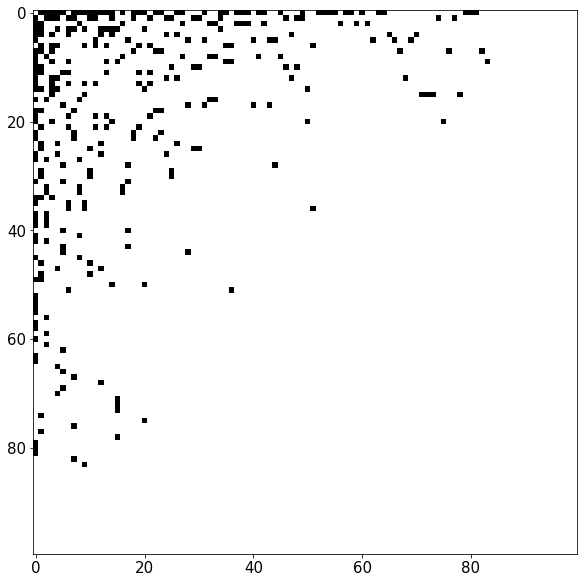

In [23]:
G=nx.from_numpy_array(np.array(simutable[7][46][14]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

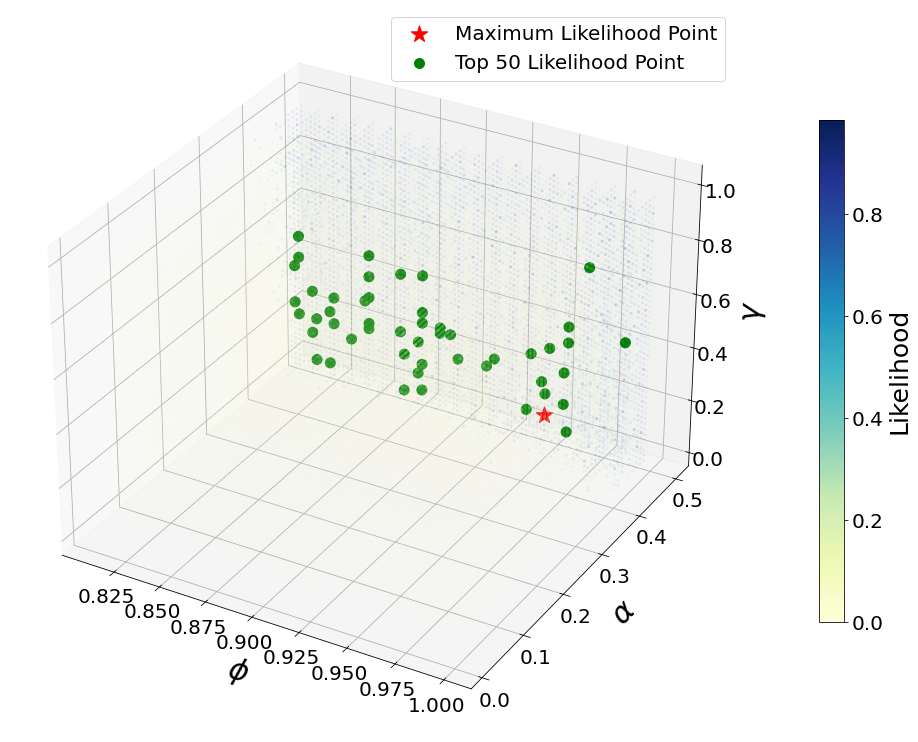

In [105]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.81, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.05 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis

ax.set_xlabel(r'$\phi$',fontsize=30, labelpad=15)
ax.set_ylabel(r'$\alpha$',fontsize=30, labelpad=15)
ax.set_zlabel(r'$\gamma$',fontsize=30, labelpad=15)

# Set tick parameters for each axis with adjusted font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)


# Add colorbar with adjusted font size
cbar = fig.colorbar(p, ax=ax, cmap='YlGnBu', fraction=0.03, pad=0.1)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Likelihood', fontsize=25)

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Maximum Likelihood Point', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Top 50 Likelihood Point', alpha=1.0)


# Show the legend
ax.legend(fontsize=20)
#fig.text(0.5, 0.15, 'Simulated Networks of Size 100', ha='center', fontsize=25)
plt.savefig('figure4_2.pdf', format='pdf')

plt.show()

In [26]:
np.mean(x_flat[indices_largest])

0.8908000000000001

In [27]:
np.mean(y_flat[indices_largest])

0.46799999999999997

In [28]:
np.mean(z_flat[indices_largest])

0.6823999999999999

In [29]:
np.std(x_flat[indices_largest])

0.05945889336339852

In [30]:
np.std(y_flat[indices_largest])

0.004472135954999584

In [31]:
np.std(z_flat[indices_largest])

0.22262578467015004

In [32]:
# statistical plotting

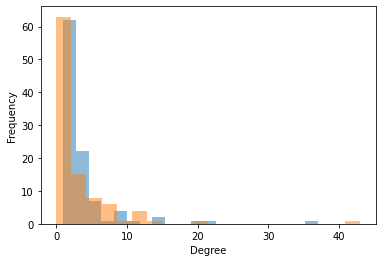

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_100_1.pdf', format='pdf')
plt.show()

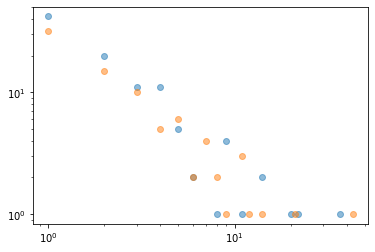

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree Frequencies')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Frequency')
#plt.legend()
plt.savefig('figure5_100_2.pdf', format='pdf')
plt.show()

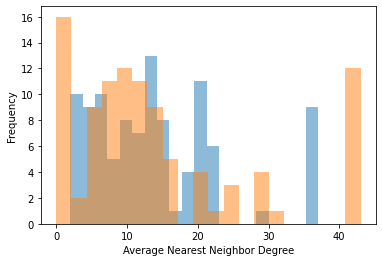

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_100_3.pdf', format='pdf')
plt.show()

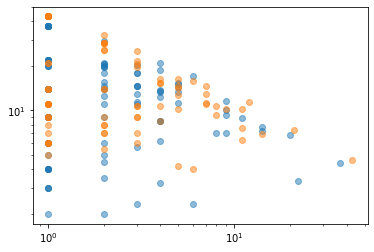

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Average Nearest Neighbor Degree')
#plt.legend()
plt.savefig('figure5_100_4.pdf', format='pdf')
plt.show()



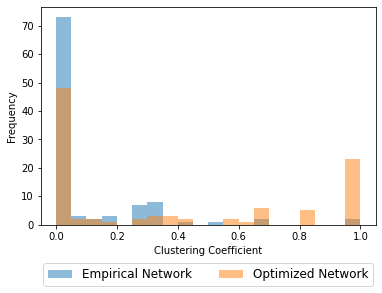

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Empirical Network ')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Optimized Network')

#plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=12)
#plt.savefig('figure5_100_5_2.pdf', format='pdf', bbox_inches='tight')
plt.show()


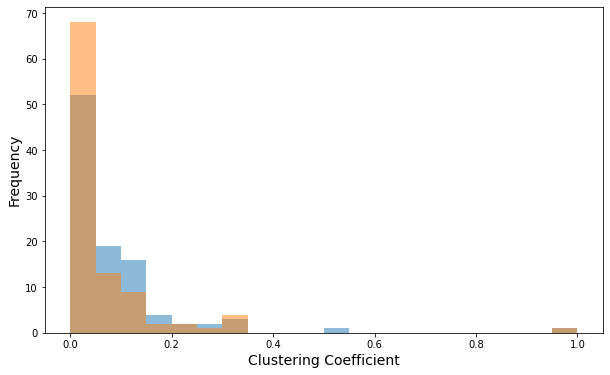

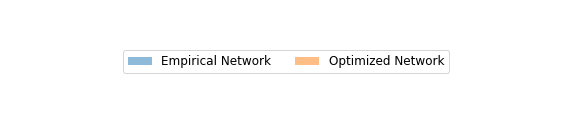

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# Replace these with your actual data for the networks
G1 = nx.erdos_renyi_graph(100, 0.05)  # Example network, replace with your data
G2 = nx.erdos_renyi_graph(100, 0.05)  # Example network, replace with your data

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Create the main plot with histograms
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(clustering_G1, bins=20, alpha=0.5, label='Empirical Network')
ax.hist(clustering_G2, bins=20, alpha=0.5, label='Optimized Network')

# Add labels
ax.set_xlabel('Clustering Coefficient', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Create and save the legend separately
handles, labels = ax.get_legend_handles_labels()

fig_legend = plt.figure(figsize=(10, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(handles, labels, loc='center', ncol=2, fontsize=12)
ax_legend.axis('off')

# Save the legend as a PDF file
fig_legend.savefig('legend_only.pdf', format='pdf', bbox_inches='tight')

plt.show()

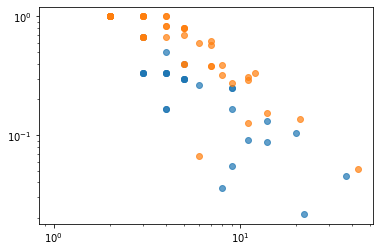

In [108]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


#plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
#plt.xlabel('Log Node Degree')
#plt.ylabel('Log Clustering Coefficient')
#plt.legend()
plt.savefig('figure5_100_6.pdf', format='pdf')
plt.show()

